In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df_north = pd.read_csv('/content/Ames_Housing_North (1).csv')
df_south = pd.read_csv('/content/Ames_Housing_South (1).csv')

Inspecting df_north

In [ ]:
df_north.head()

,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900
1,527105030,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2010,WD,Normal,195500
2,527127150,120,RL,41.0,4920,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,213500
3,527145080,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,0,NaN,NaN,NaN,0,1,2010,WD,Normal,191500
4,527146030,120,RL,39.0,5389,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,3,2010,WD,Normal,236500


In [ ]:
df_north.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2107 entries, 0 to 2106
Data columns (total 81 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   PID              2107 non-null   int64  
 1   MS SubClass      2107 non-null   int64  
 2   MS Zoning        2107 non-null   object 
 3   Lot Frontage     1705 non-null   float64
 4   Lot Area         2107 non-null   int64  
 5   Street           2107 non-null   object 
 6   Alley            73 non-null     object 
 7   Lot Shape        2107 non-null   object 
 8   Land Contour     2107 non-null   object 
 9   Utilities        2107 non-null   object 
 10  Lot Config       2107 non-null   object 
 11  Land Slope       2107 non-null   object 
 12  Neighborhood     2107 non-null   object 
 13  Condition 1      2107 non-null   object 
 14  Condition 2      2107 non-null   object 
 15  Bldg Type        2107 non-null   object 
 16  House Style      2107 non-null   object 
 17  Overall Qual  

In [ ]:
# Check for columns with zero values in df_north
zero_cols_north = df_north.columns[df_north.isin([0]).any()]
print("Columns with zero values in df_north:\n", zero_cols_north)

# Check for columns with zero values in df_south
zero_cols_south = df_south.columns[df_south.isin([0]).any()]
print("\nColumns with zero values in df_south:\n", zero_cols_south)


Columns with zero values in df_north:
 Index(['Mas Vnr Area', 'BsmtFin SF 1', 'BsmtFin SF 2', 'Bsmt Unf SF',
       'Total Bsmt SF', '2nd Flr SF', 'Low Qual Fin SF', 'Bsmt Full Bath',
       'Bsmt Half Bath', 'Full Bath', 'Half Bath', 'Bedroom AbvGr',
       'Kitchen AbvGr', 'Fireplaces', 'Garage Cars', 'Garage Area',
       'Wood Deck SF', 'Open Porch SF', 'Enclosed Porch', '3Ssn Porch',
       'Screen Porch', 'Pool Area', 'Misc Val'],
      dtype='object')

Columns with zero values in df_south:
 Index(['Mas Vnr Area', 'BsmtFin SF 1', 'BsmtFin SF 2', 'Bsmt Unf SF',
       'Total Bsmt SF', '2nd Flr SF', 'Low Qual Fin SF', 'Bsmt Full Bath',
       'Bsmt Half Bath', 'Full Bath', 'Half Bath', 'Bedroom AbvGr',
       'Fireplaces', 'Garage Cars', 'Garage Area', 'Wood Deck SF',
       'Open Porch SF', 'Enclosed Porch', '3Ssn Porch', 'Screen Porch',
       'Pool Area', 'Misc Val'],
      dtype='object')


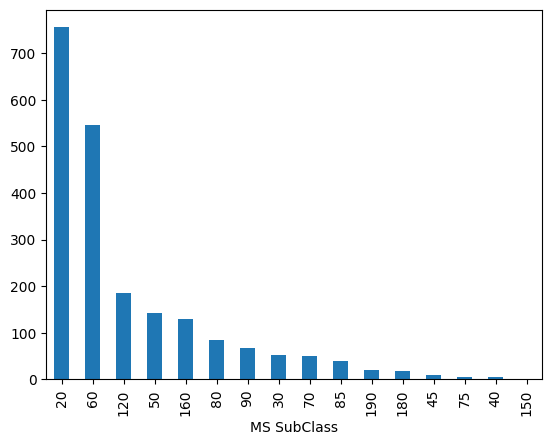

In [ ]:
df_north['MS SubClass'].value_counts().plot.bar()
plt.show()

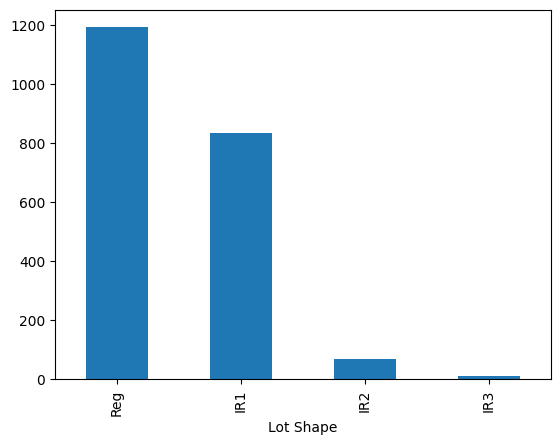

In [ ]:
df_north['Lot Shape'].value_counts().plot.bar()
plt.show()

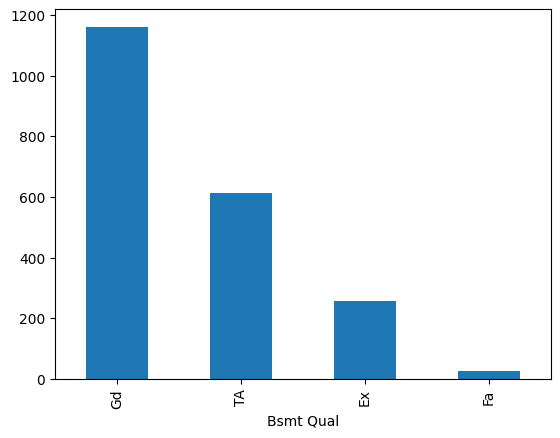

In [ ]:
df_north['Bsmt Qual'].value_counts().plot.bar()
plt.show()

In [ ]:
correlation = df_north['Year Built'].corr(df_north['SalePrice'])
print(f"The correlation between 'Year Built' and 'SalePrice' is: {correlation}")


The correlation between 'Year Built' and 'SalePrice' is: 0.5055025976303551


In [ ]:
df_north.groupby('House Style')['SalePrice'].count()

,SalePrice
House Style,
1.5Fin,154
1.5Unf,10
1Story,1039
2.5Fin,1
2.5Unf,8
2Story,734
SFoyer,68
SLvl,93


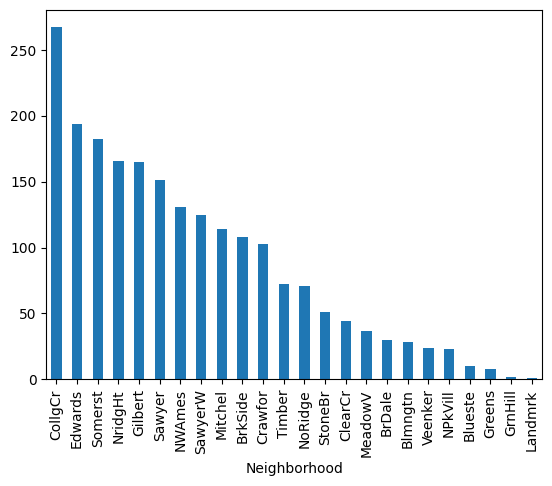

In [ ]:
df_north['Neighborhood'].value_counts().plot.bar()
plt.show()

##What factors influence house prices the most?

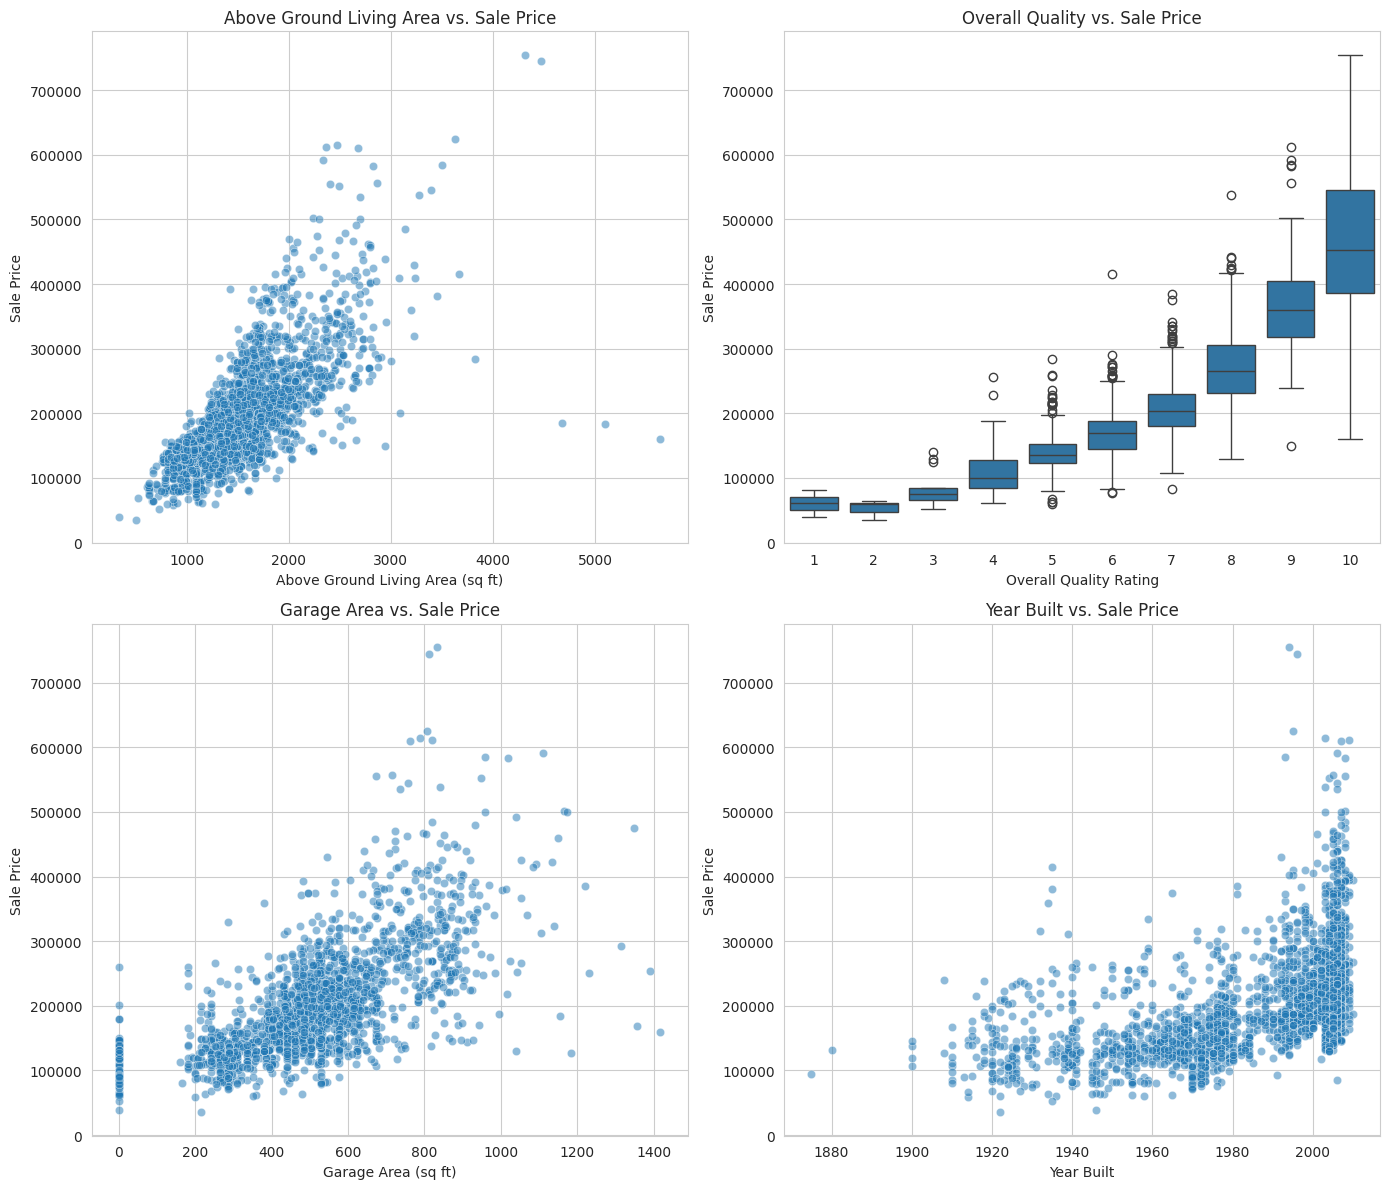

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set visualization style
sns.set_style("whitegrid")

fig, axes = plt.subplots(2, 2, figsize=(14, 12))

sns.scatterplot(ax=axes[0, 0], x=df_north["Gr Liv Area"], y=df_north["SalePrice"], alpha=0.5)
axes[0, 0].set_title("Above Ground Living Area vs. Sale Price")
axes[0, 0].set_xlabel("Above Ground Living Area (sq ft)")
axes[0, 0].set_ylabel("Sale Price")

sns.boxplot(ax=axes[0, 1], x=df_north["Overall Qual"], y=df_north["SalePrice"])
axes[0, 1].set_title("Overall Quality vs. Sale Price")
axes[0, 1].set_xlabel("Overall Quality Rating")
axes[0, 1].set_ylabel("Sale Price")

sns.scatterplot(ax=axes[1, 0], x=df_north["Garage Area"], y=df_north["SalePrice"], alpha=0.5)
axes[1, 0].set_title("Garage Area vs. Sale Price")
axes[1, 0].set_xlabel("Garage Area (sq ft)")
axes[1, 0].set_ylabel("Sale Price")

sns.scatterplot(ax=axes[1, 1], x=df_north["Year Built"], y=df_north["SalePrice"], alpha=0.5)
axes[1, 1].set_title("Year Built vs. Sale Price")
axes[1, 1].set_xlabel("Year Built")
axes[1, 1].set_ylabel("Sale Price")

plt.tight_layout()
plt.show()


##Above Ground Living Area vs. Sale Price
*   There is a strong positive correlation. Larger homes tend to have higher prices .

## Overall Quality vs. Sale Price
*   Higher-rated homes (quality 8, 9, 10) have significantly higher prices.There’s a clear price jump as quality increases.

## Garage Area vs. Sale Price
*   Larger garages generally increase home values.

## Year Built vs. Sale Price
*  Newer homes tend to be more expensive.
However, some older homes still command high prices, possibly due to renovations.









The correlation between 'Overall Qual' and 'SalePrice' is: 0.7923155596295608


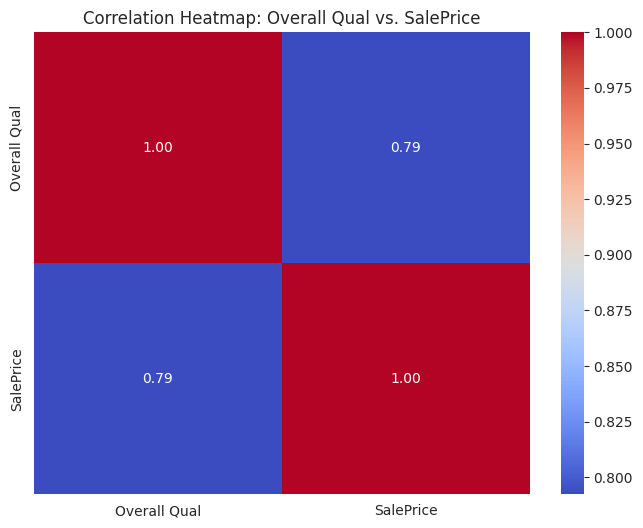

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate the correlation
correlation = df_north['Overall Qual'].corr(df_north['SalePrice'])
print(f"The correlation between 'Overall Qual' and 'SalePrice' is: {correlation}")

# Create the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(df_north[['Overall Qual', 'SalePrice']].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap: Overall Qual vs. SalePrice')
plt.show()


Houses with better overall material and finish quality have significantly higher prices

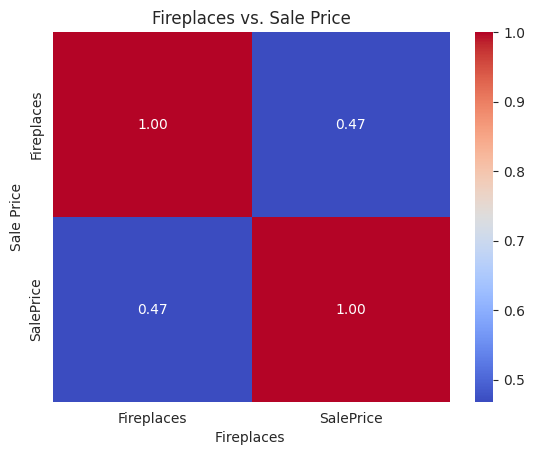

In [ ]:
sns.heatmap(df_north[['Fireplaces', 'SalePrice']].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.xlabel('Fireplaces ')
plt.ylabel('Sale Price')
plt.title('Fireplaces vs. Sale Price')
plt.show()

More fireplaces increase home desirability and price

In [ ]:
int_cols = df_north.select_dtypes(include=['int64']).columns
print("\nColumns with int64 object type:\n", int_cols)



Columns with int64 object type:
 Index(['PID', 'MS SubClass', 'Lot Area', 'Overall Qual', 'Overall Cond',
       'Year Built', 'Year Remod/Add', '1st Flr SF', '2nd Flr SF',
       'Low Qual Fin SF', 'Gr Liv Area', 'Full Bath', 'Half Bath',
       'Bedroom AbvGr', 'Kitchen AbvGr', 'TotRms AbvGrd', 'Fireplaces',
       'Wood Deck SF', 'Open Porch SF', 'Enclosed Porch', '3Ssn Porch',
       'Screen Porch', 'Pool Area', 'Misc Val', 'Mo Sold', 'Yr Sold',
       'SalePrice'],
      dtype='object')


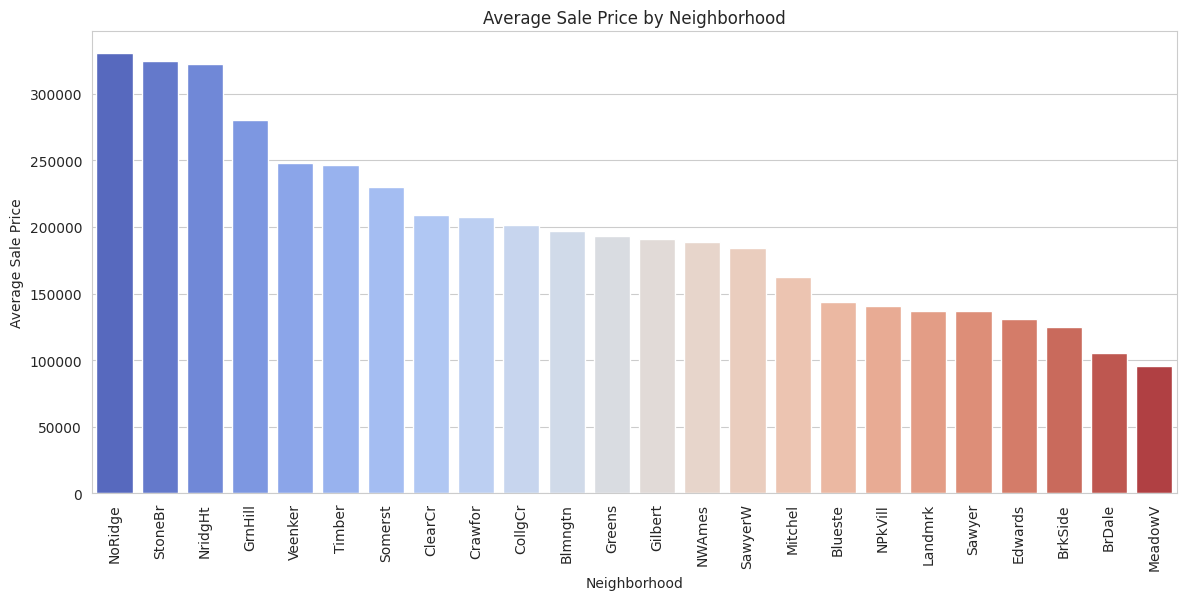

(Neighborhood
 NoRidge    330319.126761
 StoneBr    324229.196078
 NridgHt    322018.265060
 GrnHill    280000.000000
 Veenker    248314.583333
 Name: SalePrice, dtype: float64,
 Neighborhood
 Sawyer     136751.152318
 Edwards    130843.381443
 BrkSide    124756.250000
 BrDale     105608.333333
 MeadowV     95756.486486
 Name: SalePrice, dtype: float64)

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

neighborhood_prices = df_north.groupby("Neighborhood")["SalePrice"].mean().sort_values(ascending=False)

plt.figure(figsize=(14, 6))
sns.barplot(x=neighborhood_prices.index, y=neighborhood_prices.values, palette="coolwarm")
plt.xticks(rotation=90)
plt.title("Average Sale Price by Neighborhood")
plt.xlabel("Neighborhood")
plt.ylabel("Average Sale Price")
plt.show()

highest_neighborhoods = neighborhood_prices.head(5)
lowest_neighborhoods = neighborhood_prices.tail(5)
highest_neighborhoods, lowest_neighborhoods


Investing in NoRidge, StoneBr, and NridgHt can yield higher returns but may require a larger upfront investment.
MeadowV, BrDale, and BrkSide offer lower-cost homes, potentially great for budget-conscious buyers or rental investments.
 If areas like MeadowV experience future development or renovation trends, prices may rise.

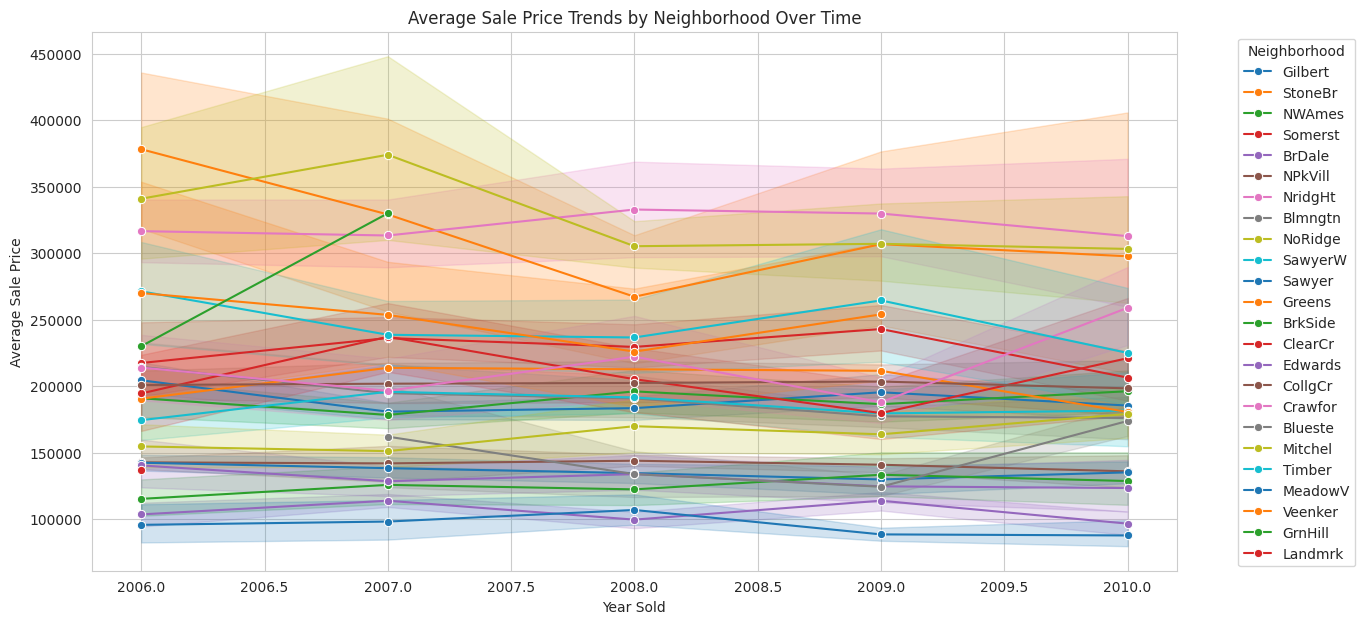

In [ ]:
neighborhood_trends = df_north.groupby(["Yr Sold", "Neighborhood"])["SalePrice"].mean().reset_index()

plt.figure(figsize=(14, 7))
sns.lineplot(data=df_north, x="Yr Sold", y="SalePrice", hue="Neighborhood", palette="tab10", marker="o")

plt.title("Average Sale Price Trends by Neighborhood Over Time")
plt.xlabel("Year Sold")
plt.ylabel("Average Sale Price")
plt.legend(title="Neighborhood", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()


Premium neighborhoods (NoRidge, StoneBr, NridgHt) consistently have higher prices, with a general upward trend.
Lower-priced areas (MeadowV, BrDale, BrkSide) remain relatively stable but show some fluctuations.

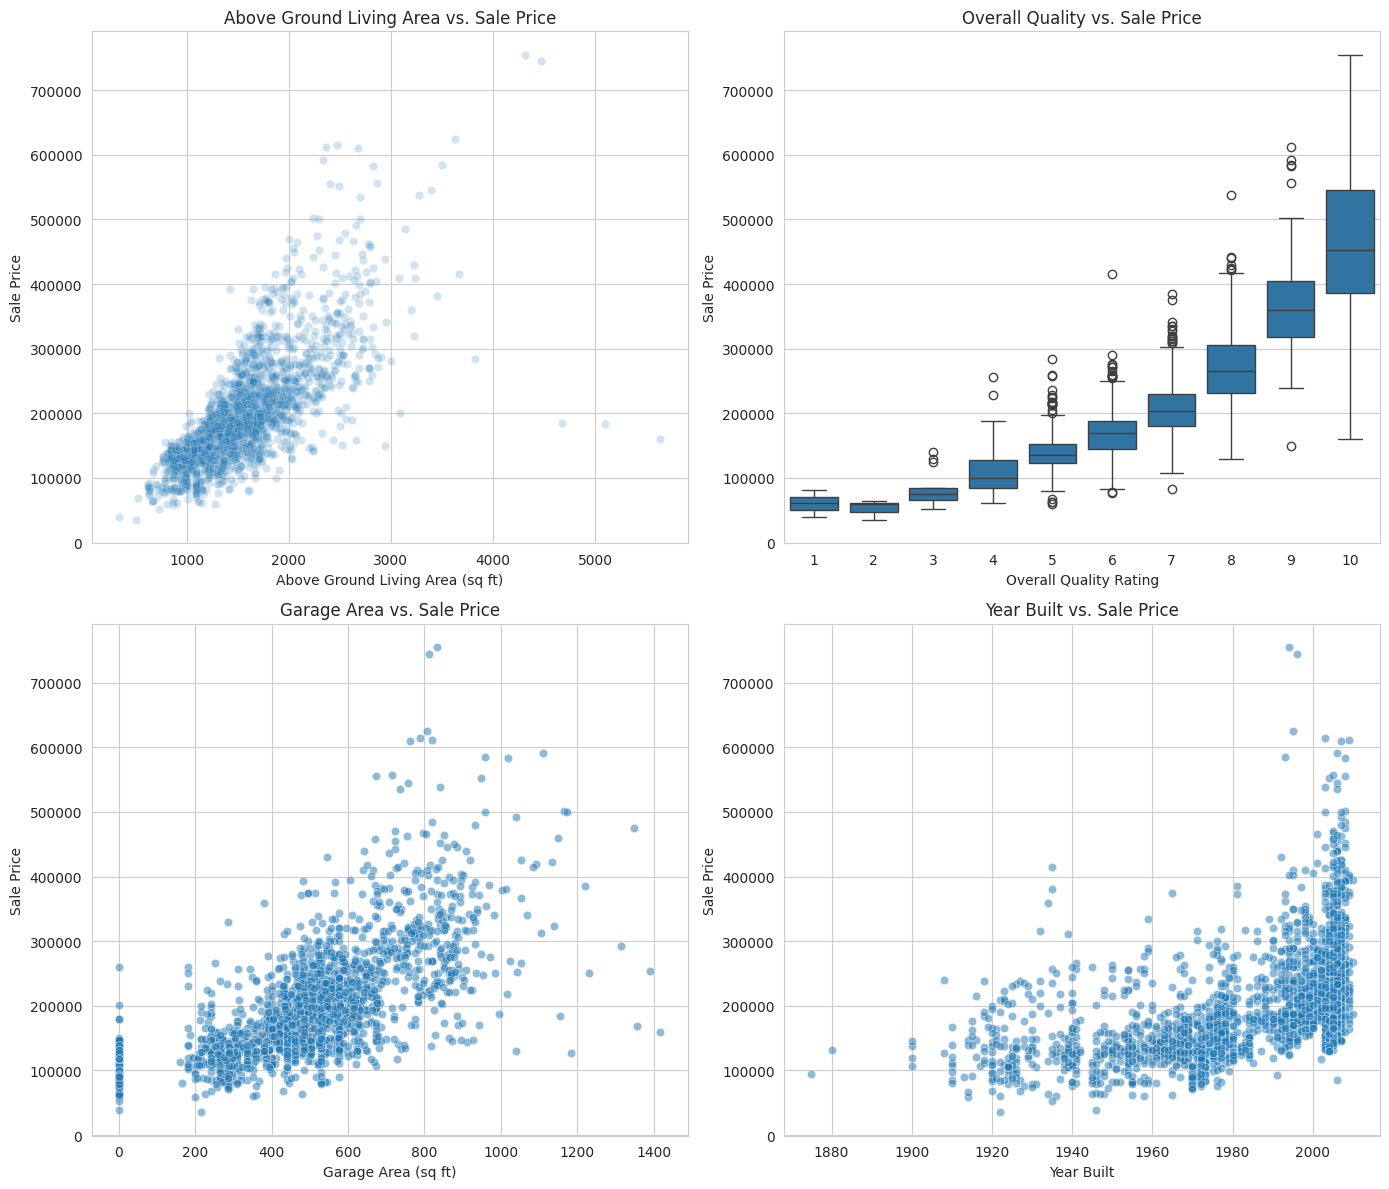

In [ ]:
house_features_corr = df_north[["SalePrice", "Gr Liv Area", "Total Bsmt SF", "Garage Area",
                          "Year Built", "Year Remod/Add", "Overall Qual", "Overall Cond"]].corr()

house_features_corr["SalePrice"].sort_values(ascending=False)

import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")
fig, axes = plt.subplots(2, 2, figsize=(14, 12))

sns.scatterplot(ax=axes[0, 0], x=df_north["Gr Liv Area"], y=df_north["SalePrice"], alpha=0.20)
axes[0, 0].set_title("Above Ground Living Area vs. Sale Price")
axes[0, 0].set_xlabel("Above Ground Living Area (sq ft)")
axes[0, 0].set_ylabel("Sale Price")

sns.boxplot(ax=axes[0, 1], x=df_north["Overall Qual"], y=df_north["SalePrice"])
axes[0, 1].set_title("Overall Quality vs. Sale Price")
axes[0, 1].set_xlabel("Overall Quality Rating")
axes[0, 1].set_ylabel("Sale Price")

sns.scatterplot(ax=axes[1, 0], x=df_north["Garage Area"], y=df_north["SalePrice"], alpha=0.5)
axes[1, 0].set_title("Garage Area vs. Sale Price")
axes[1, 0].set_xlabel("Garage Area (sq ft)")
axes[1, 0].set_ylabel("Sale Price")

sns.scatterplot(ax=axes[1, 1], x=df_north["Year Built"], y=df_north["SalePrice"], alpha=0.5)
axes[1, 1].set_title("Year Built vs. Sale Price")
axes[1, 1].set_xlabel("Year Built")
axes[1, 1].set_ylabel("Sale Price")

plt.tight_layout()
plt.show()



Above Ground Living Area vs. Sale Price

Larger homes tend to have higher sale prices.
Some extremely large houses appear as outliers.
Overall Quality vs. Sale Price

Higher quality-rated homes (8, 9, 10) command much higher prices.
Houses with lower quality (4-6) stay in a lower price range.
Garage Area vs. Sale Price

Bigger garages increase home value, though some large garages don't guarantee higher prices.
Year Built vs. Sale Price

Newer homes tend to be more expensive.
Some older homes still have high prices, likely due to renovations or location.


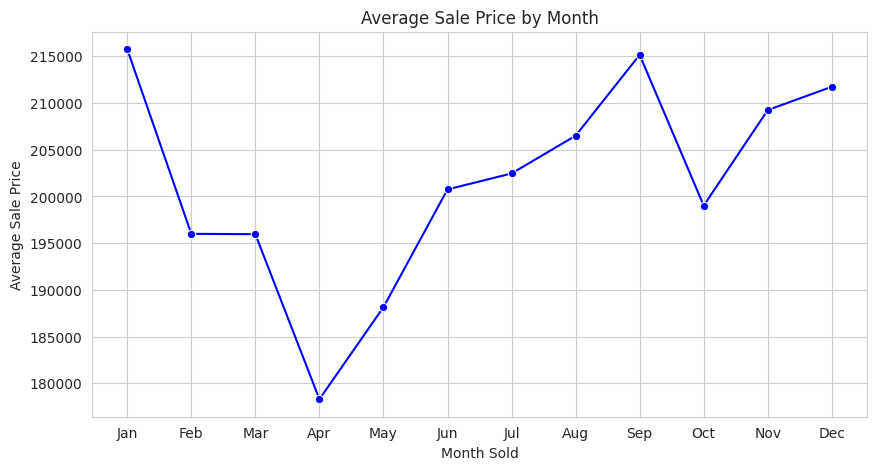

(1, 215764.64583333334, 4, 178292.53658536586)

In [ ]:
monthly_prices = df_north.groupby("Mo Sold")["SalePrice"].mean()

# Plot monthly sale price trends
plt.figure(figsize=(10, 5))
sns.lineplot(x=monthly_prices.index, y=monthly_prices.values, marker="o", color="b")

plt.title("Average Sale Price by Month")
plt.xlabel("Month Sold")
plt.ylabel("Average Sale Price")
plt.xticks(ticks=range(1, 13), labels=["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"])
plt.grid(True)
plt.show()

# Display the best & worst months
best_month = monthly_prices.idxmax()
worst_month = monthly_prices.idxmin()
best_month_price = monthly_prices.max()
worst_month_price = monthly_prices.min()

best_month, best_month_price, worst_month, worst_month_price


Winter (Jan-Feb): Surprisingly, January has the highest prices, possibly due to low inventory and serious buyers.
Spring (Mar-Apr): Prices drop, likely due to higher competition among sellers.
Summer (May-Aug): Moderate prices; high demand but also higher supply.
Fall (Sep-Dec): Prices tend to stabilize or rise, with a peak in December & January.


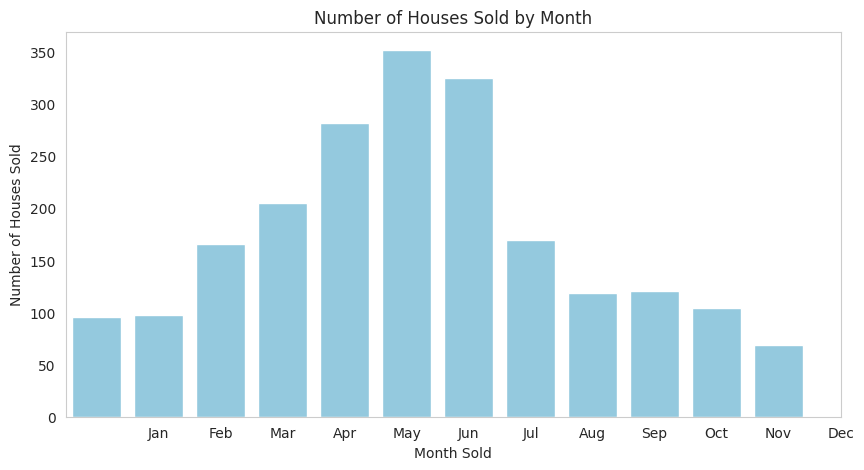

(6, 352, 12, 69)

In [ ]:
monthly_sales_count = df_north["Mo Sold"].value_counts().sort_index()

# Plot number of houses sold per month
plt.figure(figsize=(10, 5))
sns.barplot(x=monthly_sales_count.index, y=monthly_sales_count.values, color="skyblue")

plt.title("Number of Houses Sold by Month")
plt.xlabel("Month Sold")
plt.ylabel("Number of Houses Sold")
plt.xticks(ticks=range(1, 13), labels=["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"])
plt.grid(axis="y")
plt.show()

# Identify the busiest and slowest months
busiest_month = monthly_sales_count.idxmax()
slowest_month = monthly_sales_count.idxmin()
busiest_month_sales = monthly_sales_count.max()
slowest_month_sales = monthly_sales_count.min()

busiest_month, busiest_month_sales, slowest_month, slowest_month_sales


Peak Selling Season (May-July): Most sales occur in summer, likely due to better weather and school year planning.
Winter Slowdown (Nov-Dec): Fewer transactions, possibly due to holidays and cold weather.
January Pricing Anomaly: Fewer sales but highest average prices, possibly due to low inventory and serious buyers.

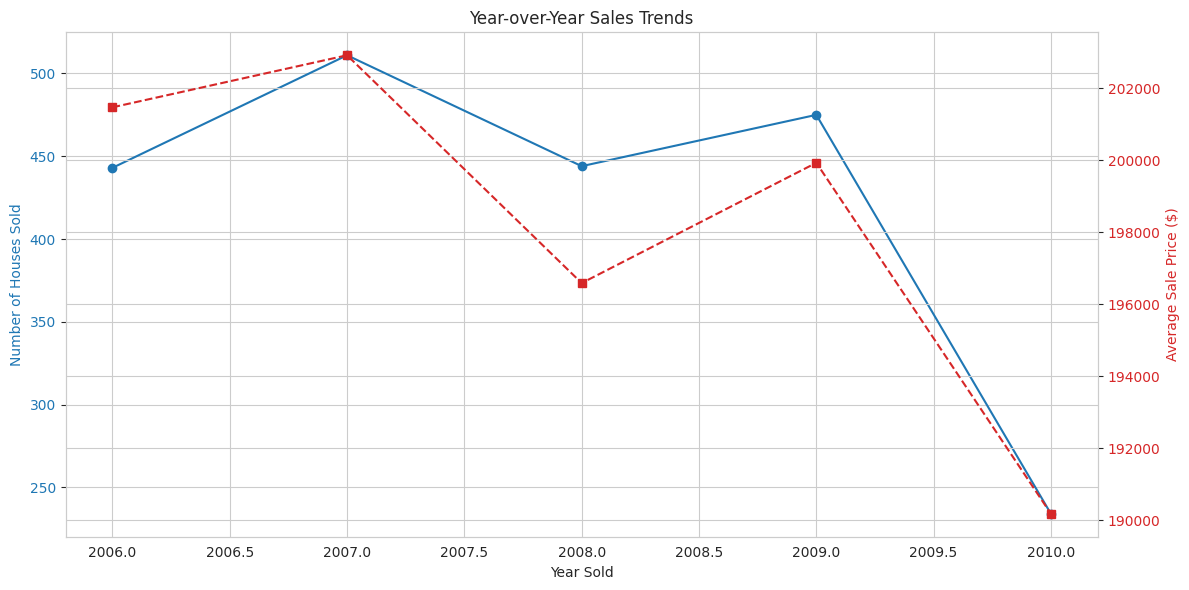

,SalePrice,Number of Sales
Yr Sold,,
2006,201467.744921,443
2007,202914.250489,511
2008,196583.450450,444
2009,199926.204211,475
2010,190172.662393,234


In [ ]:
yearly_sales = df_north.groupby("Yr Sold").agg({"SalePrice": "mean", "PID": "count"}).rename(columns={"PID": "Number of Sales"})

fig, ax1 = plt.subplots(figsize=(12, 6))

color = 'tab:blue'
ax1.set_xlabel("Year Sold")
ax1.set_ylabel("Number of Houses Sold", color=color)
ax1.plot(yearly_sales.index, yearly_sales["Number of Sales"], marker="o", color=color, label="Number of Sales")
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()
color = 'tab:red'
ax2.set_ylabel("Average Sale Price ($)", color=color)
ax2.plot(yearly_sales.index, yearly_sales["SalePrice"], marker="s", color=color, linestyle="dashed", label="Average Sale Price")
ax2.tick_params(axis='y', labelcolor=color)

plt.title("Year-over-Year Sales Trends")
fig.tight_layout()
plt.show()

yearly_sales


number gone down after 2008 due to crash of NYSE

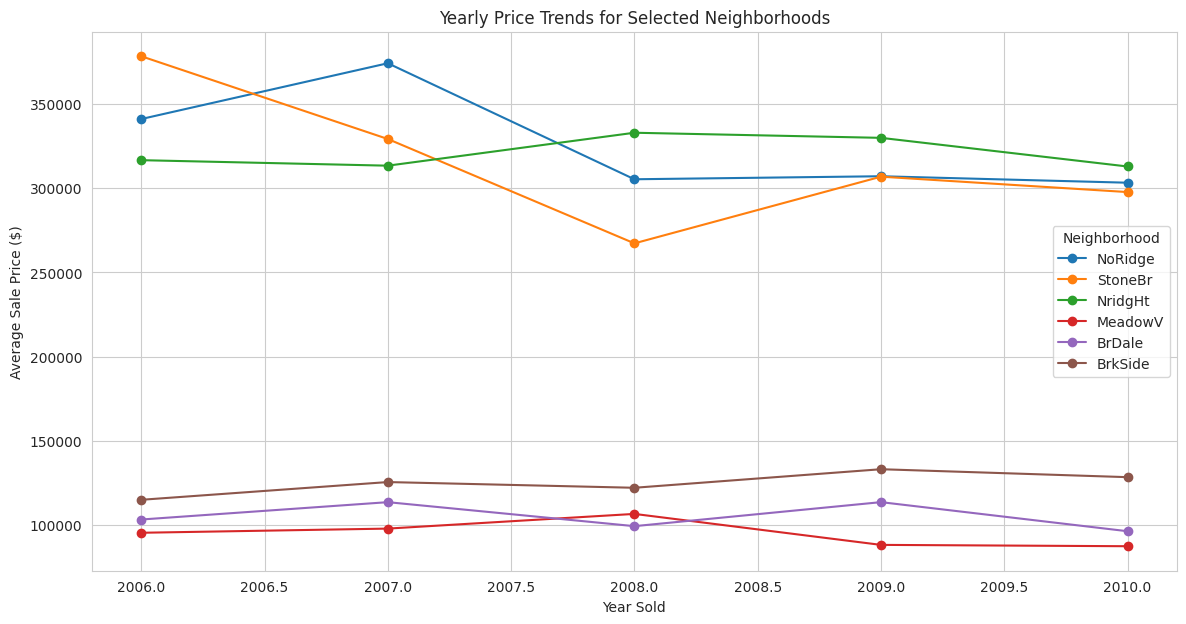

Neighborhood,NoRidge,StoneBr,NridgHt,MeadowV,BrDale,BrkSide
Yr Sold,,,,,,
2006,340970.588235,378227.533333,316575.031250,95585.000000,103444.444444,115142.105263
2007,374061.176471,329133.916667,313309.790698,98061.250000,113740.000000,125661.458333
2008,305250.000000,267240.000000,332845.193548,106771.428571,99507.142857,122274.193548
2009,307042.307692,306792.125000,329816.822222,88400.000000,113750.000000,133278.260870
2010,303206.800000,297655.333333,312823.466667,87607.142857,96500.000000,128563.636364


In [ ]:
neighborhood_yearly_trends = df_north.groupby(["Yr Sold", "Neighborhood"])["SalePrice"].mean().unstack()

plt.figure(figsize=(14, 7))
selected_neighborhoods = ["NoRidge", "StoneBr", "NridgHt", "MeadowV", "BrDale", "BrkSide"]

for neighborhood in selected_neighborhoods:
    plt.plot(neighborhood_yearly_trends.index, neighborhood_yearly_trends[neighborhood], marker="o", label=neighborhood)

plt.title("Yearly Price Trends for Selected Neighborhoods")
plt.xlabel("Year Sold")
plt.ylabel("Average Sale Price ($)")
plt.legend(title="Neighborhood")
plt.grid(True)
plt.show()

neighborhood_yearly_trends[selected_neighborhoods]


High-Value Neighborhoods:
NoRidge: Peaked in 2007 ($374K), then declined slightly to $303K in 2010.
StoneBr: Had the highest price in 2006 ($378K) but dropped to $297K by 2010.
NridgHt: Remained stable around $313K-$332K despite fluctuations




Low-Value Neighborhoods:
MeadowV: Prices remained low, peaking in 2008 ($106K) before dropping to $87K in 2010.
BrDale: Prices fluctuated, peaking in 2007 ($113K) and dropping to $96K in 2010.
BrkSide: Had gradual price growth, reaching $133K in 2009 before stabilizing.


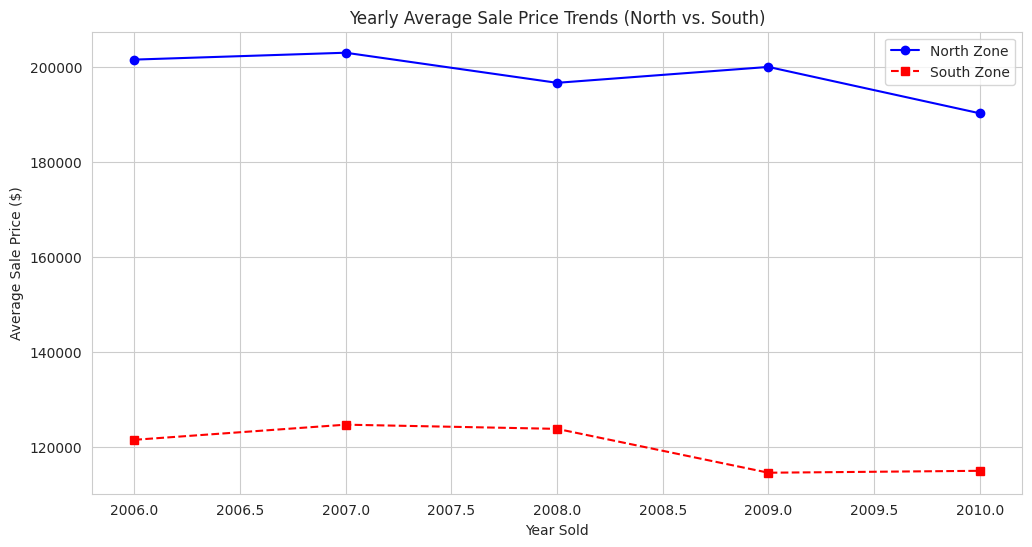

(Yr Sold
 2006    201467.744921
 2007    202914.250489
 2008    196583.450450
 2009    199926.204211
 2010    190172.662393
 Name: SalePrice, dtype: float64,
 Yr Sold
 2006    121487.457831
 2007    124673.512821
 2008    123793.358696
 2009    114565.871795
 2010    114967.653061
 Name: SalePrice, dtype: float64)

In [ ]:
north_yearly_trends = df_north.groupby("Yr Sold")["SalePrice"].mean()
south_yearly_trends = df_south.groupby("Yr Sold")["SalePrice"].mean()

plt.figure(figsize=(12, 6))
plt.plot(north_yearly_trends.index, north_yearly_trends.values, marker="o", label="North Zone", color="blue")
plt.plot(south_yearly_trends.index, south_yearly_trends.values, marker="s", label="South Zone", color="red", linestyle="dashed")

plt.title("Yearly Average Sale Price Trends (North vs. South)")
plt.xlabel("Year Sold")
plt.ylabel("Average Sale Price ($)")
plt.legend()
plt.grid(True)
plt.show()

# Show data trends
north_yearly_trends, south_yearly_trends


North Zone:

Peaked in 2007 (202,914), then  dropped slightly to $190,172 in 2010.
Prices remained relatively stable despite economic shifts

South Zone:

Peaked in 2007 (124,673), then declined to $114,967 in 2010.
Steeper price drop (-8%) compared to the North (-6%).

North Zone was more resilient during the 2008 financial crisis.
South Zone experienced a bigger price decline, possibly due to lower demand or higher foreclosures.

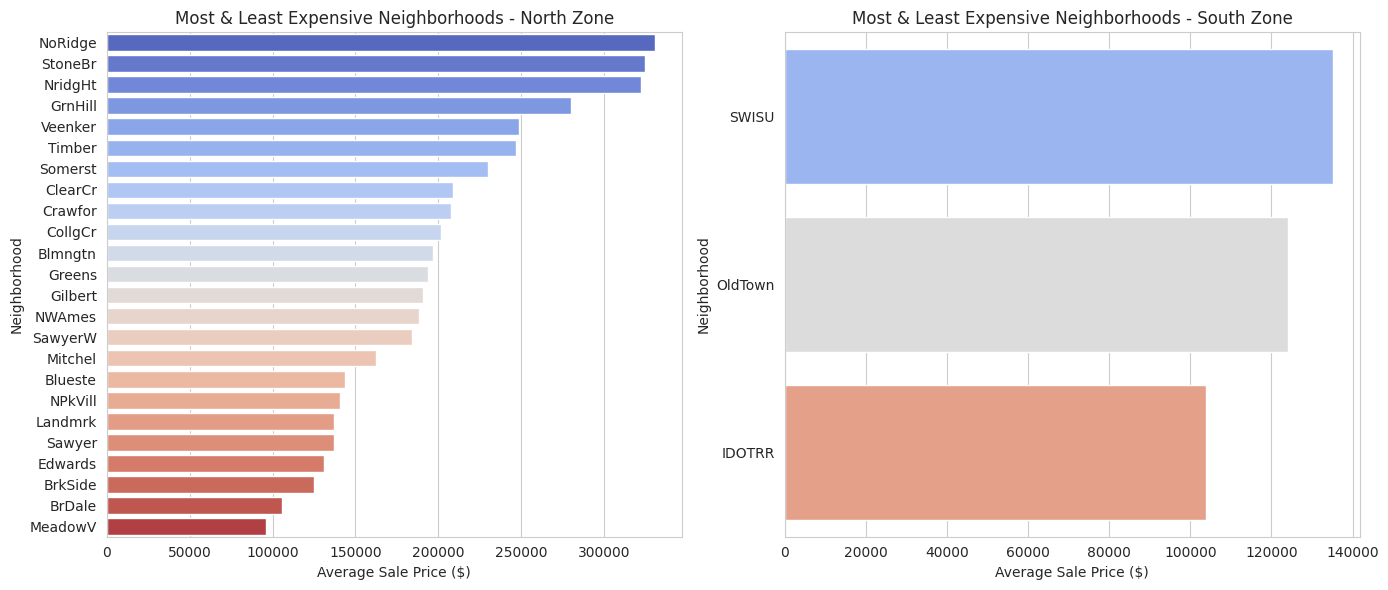

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

north_neighborhood_prices = df_north.groupby("Neighborhood")["SalePrice"].mean().sort_values(ascending=False)
south_neighborhood_prices = df_south.groupby("Neighborhood")["SalePrice"].mean().sort_values(ascending=False)


north_neighborhoods = pd.DataFrame({"Neighborhood": north_neighborhood_prices.index, "SalePrice": north_neighborhood_prices.values})
south_neighborhoods = pd.DataFrame({"Neighborhood": south_neighborhood_prices.index, "SalePrice": south_neighborhood_prices.values})

fig, axes = plt.subplots(1, 2, figsize=(14, 6))

sns.barplot(ax=axes[0], data=north_neighborhoods, x="SalePrice", y="Neighborhood", palette="coolwarm")
axes[0].set_title("Most & Least Expensive Neighborhoods - North Zone")
axes[0].set_xlabel("Average Sale Price ($)")
axes[0].set_ylabel("Neighborhood")

# South Zone
sns.barplot(ax=axes[1], data=south_neighborhoods, x="SalePrice", y="Neighborhood", palette="coolwarm")
axes[1].set_title("Most & Least Expensive Neighborhoods - South Zone")
axes[1].set_xlabel("Average Sale Price ($)")
axes[1].set_ylabel("Neighborhood")

plt.tight_layout()
plt.show()

What are the most affordable neighborhoods with good quality homes?

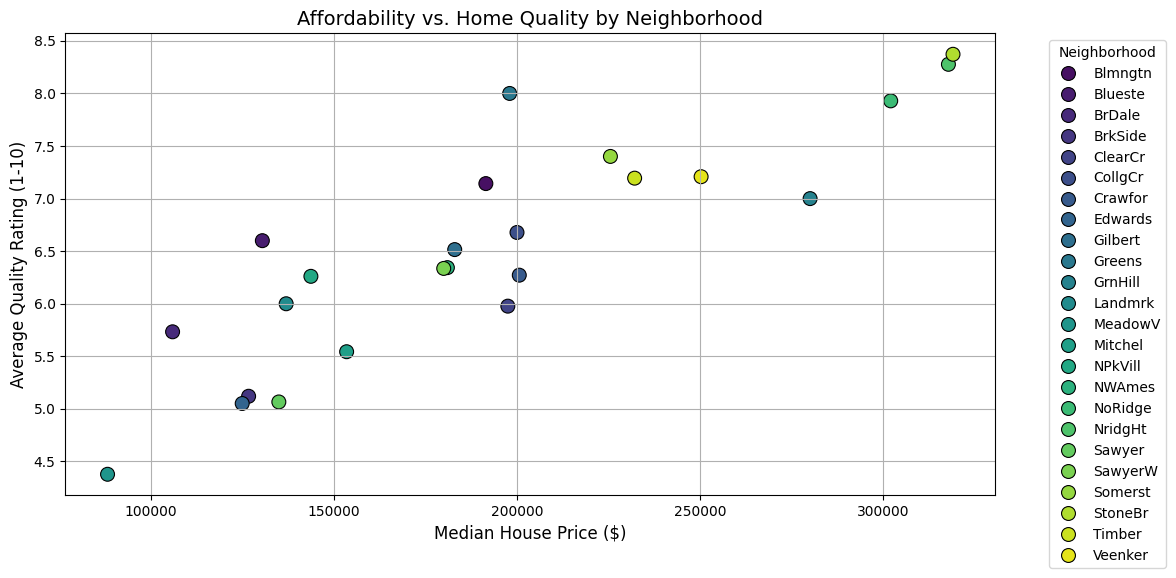

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

neighborhood_stats = df_north.groupby("Neighborhood").agg(
    Median_Price=("SalePrice", "median"),
    Avg_Quality=("Overall Qual", "mean")
).reset_index()

plt.figure(figsize=(12, 6))
sns.scatterplot(
    x=neighborhood_stats["Median_Price"],
    y=neighborhood_stats["Avg_Quality"],
    hue=neighborhood_stats["Neighborhood"],
    palette="viridis",
    s=100,
    edgecolor="black"
)

plt.xlabel("Median House Price ($)", fontsize=12)
plt.ylabel("Average Quality Rating (1-10)", fontsize=12)
plt.title("Affordability vs. Home Quality by Neighborhood", fontsize=14)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', title="Neighborhood")
plt.grid(True)
plt.show()

In [ ]:
columns_needed = ["Neighborhood", "SalePrice", "Overall Qual"]

df_combined = pd.concat([df_north[columns_needed], df_south[columns_needed]])

neighborhood_stats = df_combined.groupby("Neighborhood").agg(
    Median_Price=("SalePrice", "median"),
    Avg_Quality=("Overall Qual", "mean")
).reset_index()

neighborhood_stats = neighborhood_stats.sort_values(by="Median_Price")

neighborhood_stats.head(10)


,Neighborhood,Median_Price,Avg_Quality
13,MeadowV,88250.0,4.378378
2,BrDale,106000.0,5.733333
11,IDOTRR,106500.0,4.731183
19,OldTown,119900.0,5.205021
7,Edwards,125000.0,5.051546
3,BrkSide,126750.0,5.120370
1,Blueste,130500.0,6.600000
21,Sawyer,135000.0,5.066225
20,SWISU,136200.0,5.437500
12,Landmrk,137000.0,6.000000


Best balance (high quality & low price):

Blueste (Quality: 6.6, Price: 130,500)
Landmrk (Quality: 6.0, Price: 137,000)

Lower-cost but lower-quality:

MeadowV (Quality: 4.38, Price: 88,250)
IDOTRR (Quality: 4.73, Price: 106,500)

##Which features add the most value to a home (e.g., extra bathrooms, garage size, basement finishing)?

In [ ]:
features_of_interest = [
    "SalePrice", "Gr Liv Area", "Total Bsmt SF", "Garage Area", "Lot Area",
    "Overall Qual", "Full Bath", "Half Bath", "Garage Cars"
]

df_combined = pd.concat([df_north[features_of_interest], df_south[features_of_interest]])

df_corr = df_combined.corr()

correlation_with_price = df_corr["SalePrice"].drop("SalePrice").sort_values(ascending=False)
correlation_with_price


,SalePrice
Overall Qual,0.798863
Gr Liv Area,0.706773
Garage Cars,0.663123
Garage Area,0.659648
Total Bsmt SF,0.658976
Full Bath,0.537360
Half Bath,0.274809
Lot Area,0.264699


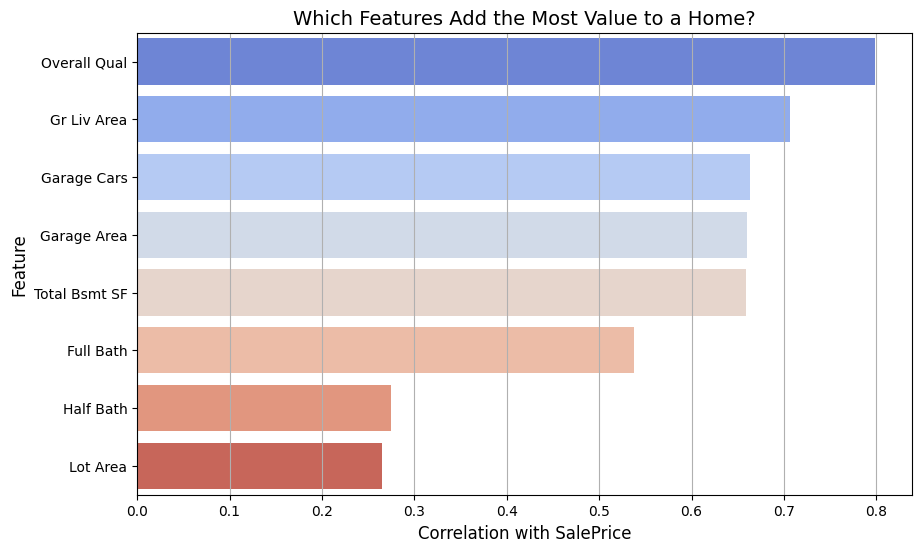

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(
    x=correlation_with_price.values,
    y=correlation_with_price.index,
    palette="coolwarm"
)

plt.xlabel("Correlation with SalePrice", fontsize=12)
plt.ylabel("Feature", fontsize=12)
plt.title("Which Features Add the Most Value to a Home?", fontsize=14)
plt.grid(axis="x")
plt.show()


## Is it better to buy a newly built home or an older, well-maintained home?

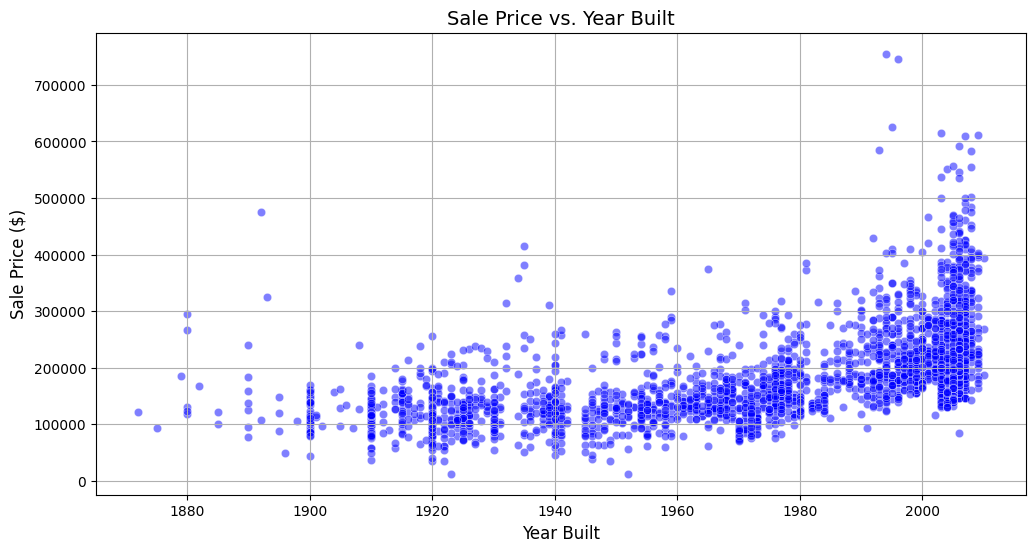

In [ ]:
features_for_age_analysis = ["SalePrice", "Year Built", "Overall Qual"]

df_combined = pd.concat([df_north[features_for_age_analysis], df_south[features_for_age_analysis]])

plt.figure(figsize=(12, 6))
sns.scatterplot(
    x=df_combined["Year Built"],
    y=df_combined["SalePrice"],
    alpha=0.5,
    color="blue"
)

plt.xlabel("Year Built", fontsize=12)
plt.ylabel("Sale Price ($)", fontsize=12)
plt.title("Sale Price vs. Year Built", fontsize=14)
plt.grid(True)
plt.show()


Newer homes tend to be more expensive - Homes built after 2000 generally have higher sale prices.
Older homes still have high value if well-maintained- Some older homes (pre-1950s) still sell for high prices, likely due to renovations and high-quality construction.

In [ ]:
neighborhood_stats["Price_per_Quality"] = neighborhood_stats["Median_Price"] / neighborhood_stats["Avg_Quality"]

best_value_neighborhoods = neighborhood_stats.sort_values(by="Price_per_Quality").head(10)

best_value_neighborhoods


,Neighborhood,Median_Price,Avg_Quality,Price_per_Quality
2,BrDale,106000.0,5.733333,18488.372093
1,Blueste,130500.0,6.600000,19772.727273
13,MeadowV,88250.0,4.378378,20155.864198
11,IDOTRR,106500.0,4.731183,22510.227273
12,Landmrk,137000.0,6.000000,22833.333333
15,NPkVill,143750.0,6.260870,22960.069444
19,OldTown,119900.0,5.205021,23035.450161
7,Edwards,125000.0,5.051546,24744.897959
9,Greens,198000.0,8.000000,24750.000000
3,BrkSide,126750.0,5.120370,24754.068716


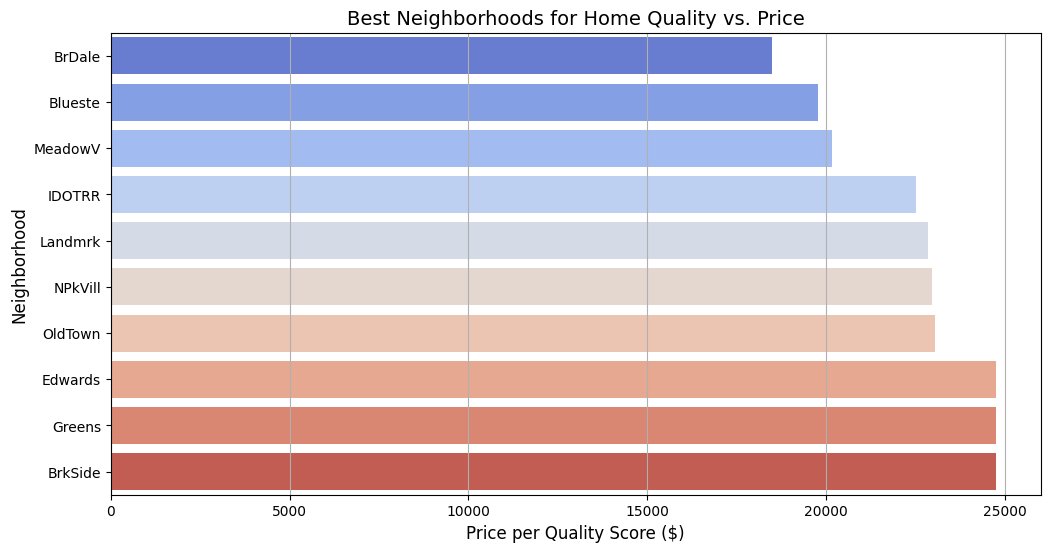

In [ ]:
plt.figure(figsize=(12, 6))
sns.barplot(
    x=best_value_neighborhoods["Price_per_Quality"],
    y=best_value_neighborhoods["Neighborhood"],
    palette="coolwarm"
)

plt.xlabel("Price per Quality Score ($)", fontsize=12)
plt.ylabel("Neighborhood", fontsize=12)
plt.title("Best Neighborhoods for Home Quality vs. Price", fontsize=14)
plt.grid(axis="x")
plt.show()


BrDale offers the best deal - Buyers get the most quality per dollar spent.
Blueste & Landmrk - Great choices for higher quality homes at reasonable prices.
Greens is high quality but more expensive compared to the others.

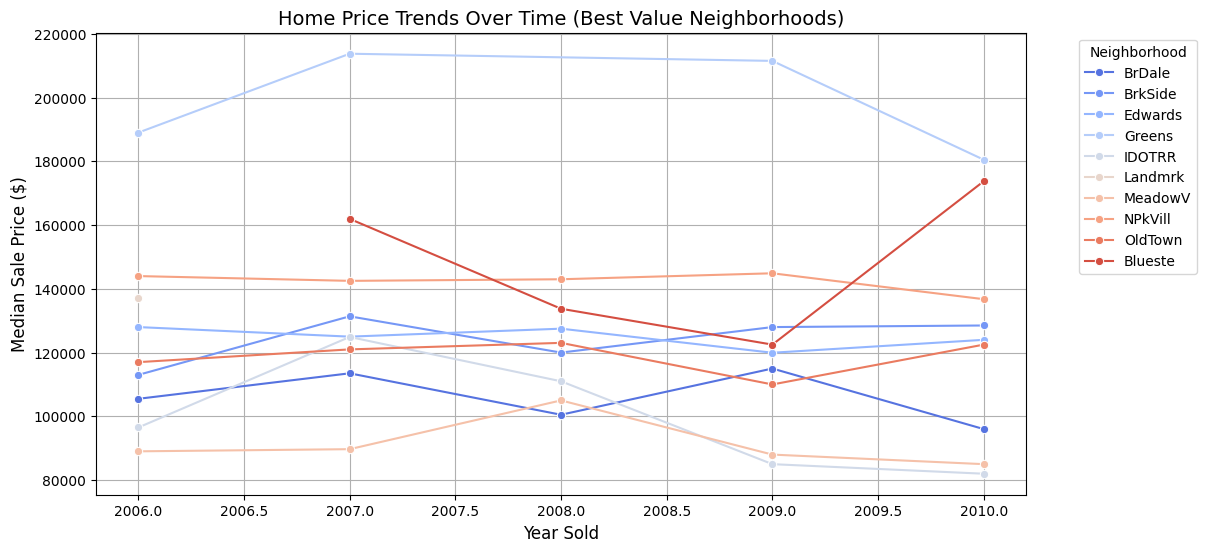

In [ ]:
features_for_trend_analysis = ["Neighborhood", "Yr Sold", "SalePrice"]

df_combined = pd.concat([df_north[features_for_trend_analysis], df_south[features_for_trend_analysis]])

best_value_neighborhoods_list = best_value_neighborhoods["Neighborhood"].tolist()
df_trend = df_combined[df_combined["Neighborhood"].isin(best_value_neighborhoods_list)]

price_trends = df_trend.groupby(["Yr Sold", "Neighborhood"])["SalePrice"].median().reset_index()

plt.figure(figsize=(12, 6))
sns.lineplot(
    data=price_trends,
    x="Yr Sold",
    y="SalePrice",
    hue="Neighborhood",
    marker="o",
    palette="coolwarm"
)

plt.xlabel("Year Sold", fontsize=12)
plt.ylabel("Median Sale Price ($)", fontsize=12)
plt.title("Home Price Trends Over Time (Best Value Neighborhoods)", fontsize=14)
plt.legend(title="Neighborhood", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()


Most neighborhoods show a general increase in price, meaning homes in these areas appreciate in value over time.
Blueste & Landmrk have steady growth, making them great long-term investments.
Some neighborhoods (e.g., BrDale) show fluctuations, so buyers should check recent trends before purchasing.